In [ ]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols
from sympy import simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import pandas as pd
from IPython.display import Latex
from google.colab import files
import numpy as np

In [ ]:
2+2


4

# Практическое занятие 14
# Компьютерный практикум по алгебре на Python
### Задание 1.
Составить матрицу квадратичной формы $16x^2-21y^2+3z^2-4xy-4xz+10yz$, проверить, что она определяет именно заданный многочлен.

In [ ]:
x, y, z = symbols("x y z")
u = 16 * x**2 - 21*y**2 + 3*z**2 - 4*x*y - 4*x*z+ 10*y*z
u

16*x**2 - 4*x*y - 4*x*z - 21*y**2 + 10*y*z + 3*z**2

In [ ]:
A = Matrix([[16, -2, -2],
            [-2 ,-21, 5],
            [-2, 5 ,3]])

X = Matrix([x, y, z])
res = X.T * A * X
quadr_form = simplify(res[0])

display(Latex(f'X = {latex(X)},\ X^T  A  X = {latex(quadr_form)},\ \
X^T  A  X - u = {latex(quadr_form - u)}'))

<IPython.core.display.Latex object>

### Задание 2.
Заданы векторы  $e_1=(1, 0, 1)$, $e_2=(-1, 0, 1)$, $e_1=(0, 1, 0)$.
Вывести (используя цикл!) на экран матрицу квадратичной формы Задания 1 в новом базисе из векторов


1.   ($e_1$, $e_2$, $e_3$),
2.   ($e_1$, $e_2 - e_1$, $e_3$),
3.   ($e_1$, $e_2$, $e_3 - e_1$),
4.   ($e_1$, $e_2 - e_1$, $e_3 - e_1$),
5.   ($e_1 + e_2$, $e_2$, $e_3 + e_2$),

при этом в файл "task2.xlsx" записать на листы $A_1$, $A_2$, ... матрицы в новом базисе, а на листы  $P_1$, $P_2$, ... соответствующие матрицы перехода.

In [ ]:
e1 = Matrix([1, 0, 1])
e2 = Matrix([-1, 0, 1])
e3 = Matrix([0, 1, 0])

A = Matrix([[16, -2, -2],
            [-2 ,-21, 5],
            [-2, 5 ,3]])

arr = [sympy.Matrix.hstack(e1, e2, e3), sympy.Matrix.hstack(e1, e2 - e1, e3), sympy.Matrix.hstack(e1, e2, e3 - e1),
       sympy.Matrix.hstack(e1, e2 - e1, e3-e1), sympy.Matrix.hstack(e1 + e2, e2, e3+e2)]
file_name = "task2.xlsx"

for i, P in enumerate(arr):
  A_new = P.T * A * P
  display(Latex(f'P_{i+1} = {latex(P)}, A_{i+1} = {latex(A_new)}'))
  print('--'*20)
  if i==0:
    with pd.ExcelWriter(file_name,mode="w") as writer:
      df1 = pd.DataFrame(np.array(A_new))
      df2 = pd.DataFrame(np.array(P))
      df1.to_excel(writer, sheet_name=f"A{i+1}", index=False, header=False)
      df2.to_excel(writer, sheet_name=f"P{i+1}", index=False, header=False)
  else:
    with pd.ExcelWriter(file_name,mode="a") as writer:
      df1 = pd.DataFrame(np.array(A_new))
      df2 = pd.DataFrame(np.array(P))
      df1.to_excel(writer, sheet_name=f"A{i+1}", index=False, header=False)
      df2.to_excel(writer, sheet_name=f"P{i+1}", index=False, header=False)

<IPython.core.display.Latex object>

----------------------------------------


<IPython.core.display.Latex object>

----------------------------------------


<IPython.core.display.Latex object>

----------------------------------------


<IPython.core.display.Latex object>

----------------------------------------


<IPython.core.display.Latex object>

----------------------------------------


In [ ]:
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Задание 3.
В цикле из файла "task3.xlsx" считать матрицы, вывести на экран каждую матрицу и ее собственные числа и собственные векторы.

In [ ]:
from google.colab import files
uploaded = files.upload()
for file_name in uploaded.keys():
    print(f'Загружен файл {file_name}')

Saving task3.xlsx to task3.xlsx
Загружен файл task3.xlsx


In [ ]:
import pandas as pd
for i in range(1, 6):
  df = pd.read_excel(file_name, sheet_name=f"A{i}",header=None)
  A = Matrix(df.to_numpy())
  res_vec = A.eigenvects()
  display(A)
  print("Собственные вектора:")
  display(Latex(latex(res_vec)))
  res_num = list(A.eigenvals().keys())
  display(Latex(latex(res_num)))
  print("-"*100)

Matrix([
[  7, 37, -37],
[ 37, -5,   5],
[-37,  5,  -5]])

Собственные вектора:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------


Matrix([
[  7,  30, -37],
[ 30, -72,  42],
[-37,  42,  -5]])

Собственные вектора:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------


Matrix([
[  7,  37, -44],
[ 37,  -5, -32],
[-44, -32,  76]])

Собственные вектора:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------


Matrix([
[  7,  30, -44],
[ 30, -72,  12],
[-44,  12,  76]])

Собственные вектора:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------


Matrix([
[76, 32, 0],
[32, -5, 0],
[ 0,  0, 0]])

Собственные вектора:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------


### Задание 4.
Привести квадратичную форму с матрицей
$$
\left[\begin{matrix}-645 & -12 & -960\\-12 & 3 & 9\\-960 & 9 & -1205\end{matrix}\right]
$$
к каноническому виду с помощью перехода к новому базису из собственных векторов.

Вывести на экран матрицу перехода к новому базису, матрицу квадратичной формы в новом базисе и квадратичную форму в старом и новом базисе (в виде многочлена от переменных $x$, $y$, $z$).

In [ ]:
def to_pol(A):
  x, y, z = symbols("x y z")
  dic = [x, y, z]
  u = 0
  for i in range(A.shape[0]):
    for j in range(A.shape[0]):
      if i==j:
        u += A[i, j]*dic[i]*dic[j]
      else:
        u += 2*A[i, j]*dic[i]*dic[j]
  return u

In [ ]:
x, y, z = symbols("x y z")
A = Matrix([[-645, -12, -960],
            [-12, 3, 9],
            [-960, 9, -1205]])
ev = A.eigenvects()
P = Matrix([Matrix([vect.normalized() for vect in vects]).T for num, multipl, vects in ev]).T
A_new = P.T * A * P
print("Матрица новога перехода в старом базисе:")
display(to_pol(A))
print("Матрицп перехода")
display(P)
print("Матрица новога перехода в новом базисе:")
display(to_pol(A_new))

Матрица новога перехода в старом базисе:


-645*x**2 - 48*x*y - 3840*x*z + 3*y**2 + 36*y*z - 1205*z**2

Матрицп перехода


Matrix([
[3/5, -2*sqrt(26)/65, -2*sqrt(26)/13],
[  0, -5*sqrt(26)/26,    sqrt(26)/26],
[4/5, 3*sqrt(26)/130,  3*sqrt(26)/26]])

Матрица новога перехода в новом базисе:


-1925*x**2 + 78*z**2

In [ ]:
x, y, z = symbols("x y z")
X = Matrix([x, y, z])
res = simplify(expand(X.T * A_new * X))[0]
print("Каноничный вид :")
display(res)

Каноничный вид :


-1925*x**2 + 78*z**2

### Задание 5*.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика.

In [ ]:
A = Matrix([[97, -72, 241], [-72, 97, - 266], [241, - 266 , -3452]])
X = Matrix([x, y, 1])
display(Latex(f'A = {latex(A)}, X = {latex(X)}'))

<IPython.core.display.Latex object>

In [ ]:
alpha = sympy.acot((A[0, 0] - A[1, 1]) / (2 * A[0, 1])) / 2
P = Matrix([[Cos(alpha), -Sin(alpha), 0],
            [Sin(alpha), Cos(alpha), 0],
            [0, 0, 1]])
P.simplify()
display(P)

Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0],
[sqrt(2)/2,  sqrt(2)/2, 0],
[        0,          0, 1]])

In [ ]:
A_new = P.T * A * P
A_new.simplify()
display(A_new)

Matrix([
[           25,              0,  -25*sqrt(2)/2],
[            0,            169, -507*sqrt(2)/2],
[-25*sqrt(2)/2, -507*sqrt(2)/2,          -3452]])

In [ ]:
X3_new = Matrix((x - A_new[0, 2] / A_new[0, 0],
                 y - A_new[1, 2] / A_new[1, 1],
                 1))
eq_new = simplify(expand(X3_new.T * A_new * X3_new))[0]
eq_new

25*x**2 + 169*y**2 - 4225

In [ ]:
free = eq_new.subs({x: 0, y: 0})
eq_last = eq_new / (-free) + 1
eq_res = Eq(eq_last, 1)
print("Каноническое уравнение:")
eq_res

Каноническое уравнение:


Eq(x**2/169 + y**2/25, 1)

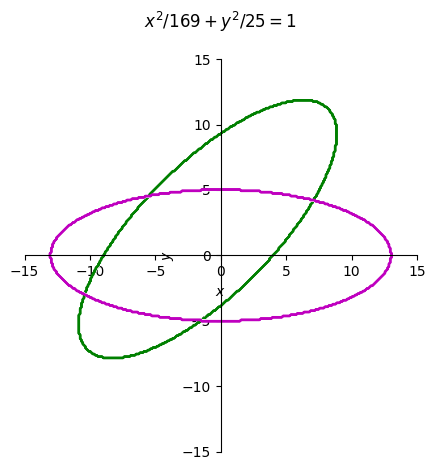

In [ ]:
eq3 = Eq(simplify(expand(X.T * A * X))[0], 0)
import matplotlib.pyplot as plt
p = plot_implicit(eq3,(x, -15, 15),(y, -15, 15), line_color='g', aspect_ratio=(1, 1),
                  xlabel='$x$', ylabel='$y$',
                   title=f'{latex(eq_res, mode="inline")}\n',
                   adaptive=False, show=False)

p.extend(plot_implicit(eq_res, (x, -15, 15),(y, -15, 15), line_color='m',
                       aspect_ratio=(1, 1), adaptive=False, show=False))
p.show()

### Задание 6*.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика.

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

In [ ]:
A = Matrix([[1, 1, -2], [1, 1,  2], [-2, 2 , -4]])
X = Matrix([x, y, 1])
display(Latex(f'A = {latex(A)}, X = {latex(X)}'))

<IPython.core.display.Latex object>

In [ ]:
alpha = sympy.acot((A[0, 0] - A[1, 1]) / (2 * A[0, 1])) / 2
P = Matrix([[Cos(alpha), -Sin(alpha), 0],
            [Sin(alpha), Cos(alpha), 0],
            [0, 0, 1]])
P.simplify()
display(P)

Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0],
[sqrt(2)/2,  sqrt(2)/2, 0],
[        0,          0, 1]])

In [ ]:
A_new = P.T * A * P
A_new.simplify()
display(A_new)

Matrix([
[2,         0,         0],
[0,         0, 2*sqrt(2)],
[0, 2*sqrt(2),        -4]])

In [ ]:
X3_new = Matrix((x - A_new[0, 2] / A_new[0, 0],
                 y - A_new[1, 2] / A_new[1, 1],
                 1))
eq_new = simplify(expand(X3_new.T * A_new * X3_new))[0]
eq_new

2*x**2 + 4*sqrt(2)*y + zoo

In [ ]:
free = eq_new.subs({x: 0, y: 0})
eq_last = eq_new / (-free) + 1
eq_res = Eq(eq_last, 1)
print("Каноническое уравнение:")
eq_res

Каноническое уравнение:


Eq((2*x**2 + 4*sqrt(2)*y - 4*sqrt(2) - 4)/(4 + 4*sqrt(2)) + 1, 1)

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

In [ ]:
x, y ,z = symbols("x y z")

q = 137527*x**2 - 180*((91)**(S(1)/2))*x*y + 14828*((11)**(S(1)/2))*x*z - 82700*y**2 + 540*((1001)**(S(1)/2))*y*z - 104827*z**2

In [ ]:
A = Matrix([[137527, - 90*((91)**(S(1)/2)), 7414*((11)**(S(1)/2))],
            [-90*((91)**(S(1)/2)), - 82700, 270*((1001)**(S(1)/2))],
            [7414*((11)**(S(1)/2)), 270*((1001)**(S(1)/2)), -104827]])
ev = A.eigenvects()
display(A)
Latex(latex(ev))

Matrix([
[       137527,   -90*sqrt(91),  7414*sqrt(11)],
[ -90*sqrt(91),         -82700, 270*sqrt(1001)],
[7414*sqrt(11), 270*sqrt(1001),        -104827]])

<IPython.core.display.Latex object>

In [ ]:
A

Matrix([
[       137527,   -90*sqrt(91),  7414*sqrt(11)],
[ -90*sqrt(91),         -82700, 270*sqrt(1001)],
[7414*sqrt(11), 270*sqrt(1001),        -104827]])

In [ ]:
P = Matrix([Matrix([vect.normalized() for vect in vects]).T for num, multipl, vects in ev]).T
A_new = P.T * A * P
print("Матрица новога перехода в старом базисе:")
display(Latex(latex(A)))
print("Матрицa перехода")
display(Latex(latex(P)))
print("Матрица новога перехода в новом базисе:")
display(Latex(latex(A_new)))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sympy.abc import x, y, z
A = Matrix([[137527, - 90*((91)**(S(1)/2)), 7414*((11)**(S(1)/2))],
            [-90*((91)**(S(1)/2)), - 82700, 270*((1001)**(S(1)/2))],
            [7414*((11)**(S(1)/2)), 270*((1001)**(S(1)/2)), -104827]])
X = Matrix([x, y, z])
ev = A.eigenvects()
P = Matrix([Matrix([vect.normalized() for vect in vects]).T for num, multipl, vects in ev]).T
A_new = P.T * A * P
display(A, A_new, simplify(expand(X.T * A_new * X))[0])